# Imports

In [8]:
from src.data_analysis.DataManipulation import DataManipulation
from src.data_analysis.Report import Report
from src.data_analysis.Prices import Prices
from src.TradeLogic import TradeLogic
from src.Backtest import Backtest
import seaborn
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

# Market Data prepare

In [2]:
symbol='PETR4'
dm = DataManipulation()
px = Prices()
df_ohlc = dm.get_symbol_ohlc_df(symbol,'TIMEFRAME_M1',1000000000000)
df=df_ohlc.values

Connect Sucessfully (500, 4040, '20 Oct 2023')


In [3]:
# px.general_report(df_ohlc)

In [4]:
# _=px.monte_carlo_simulation(df_ohlc, 1, 252, 100000)

# Backtest

In [5]:
tl = TradeLogic(100,stop_loss=5,take_profit=15)
bt = Backtest(symbol,df,tl,limit_history=100)
trades=bt.run()


Initializing backtest


Finish backtest



# Report

In [6]:
bt.get_report_pointer().get_backtest_results()

{'total_trades': 8987,
 'total_bought': 4490,
 'total_sold': 4497,
 'gross_profit': 559380.0,
 'gross_loss': -498903.0,
 'qty_profit': 5404,
 'qty_loss': 2791,
 'qty_none': 792,
 'profit_trades_perc': 60.13130076777568,
 'profit_factor': 1.121219956584747,
 'max_winner_result': 3781.0,
 'max_loss_result': -3618.0,
 'average_profit': 103.51221317542561,
 'average_loss': -178.75420996058762,
 'max_drawdown': 37090.0,
 'returns': 60476.99999999994,
 'perc_returns': 163.05473173362077}


					Trading PETR4 backtest:

Gross profit: 			 559380.0			Winner trades: 		 5404
Gross loss: 			 -498903.0			Losing trades: 		 2791
Largest profit trade:		 3781.0				Largest loss trade:	 -3618.0
Average profit trade: 		 103.51				
Profit trades (% of total): 	 60.13 %

Profit factor: 			 1.12
Average loss trade: 		 -178.75
Profit/Loss: 			 0.58
Total Net profit: 		 60477.0
Percentual return: 		 163.05 %

Number of trades: 		 8987
Bought trades: 			 4490
Sold trades: 			 4497 

Balance Drawdown Maximal: 	 37090.0
Balance Drawdown Maximal Time Range: 2019-04-01 13:47:00  until  2020-12-09 17:48:00


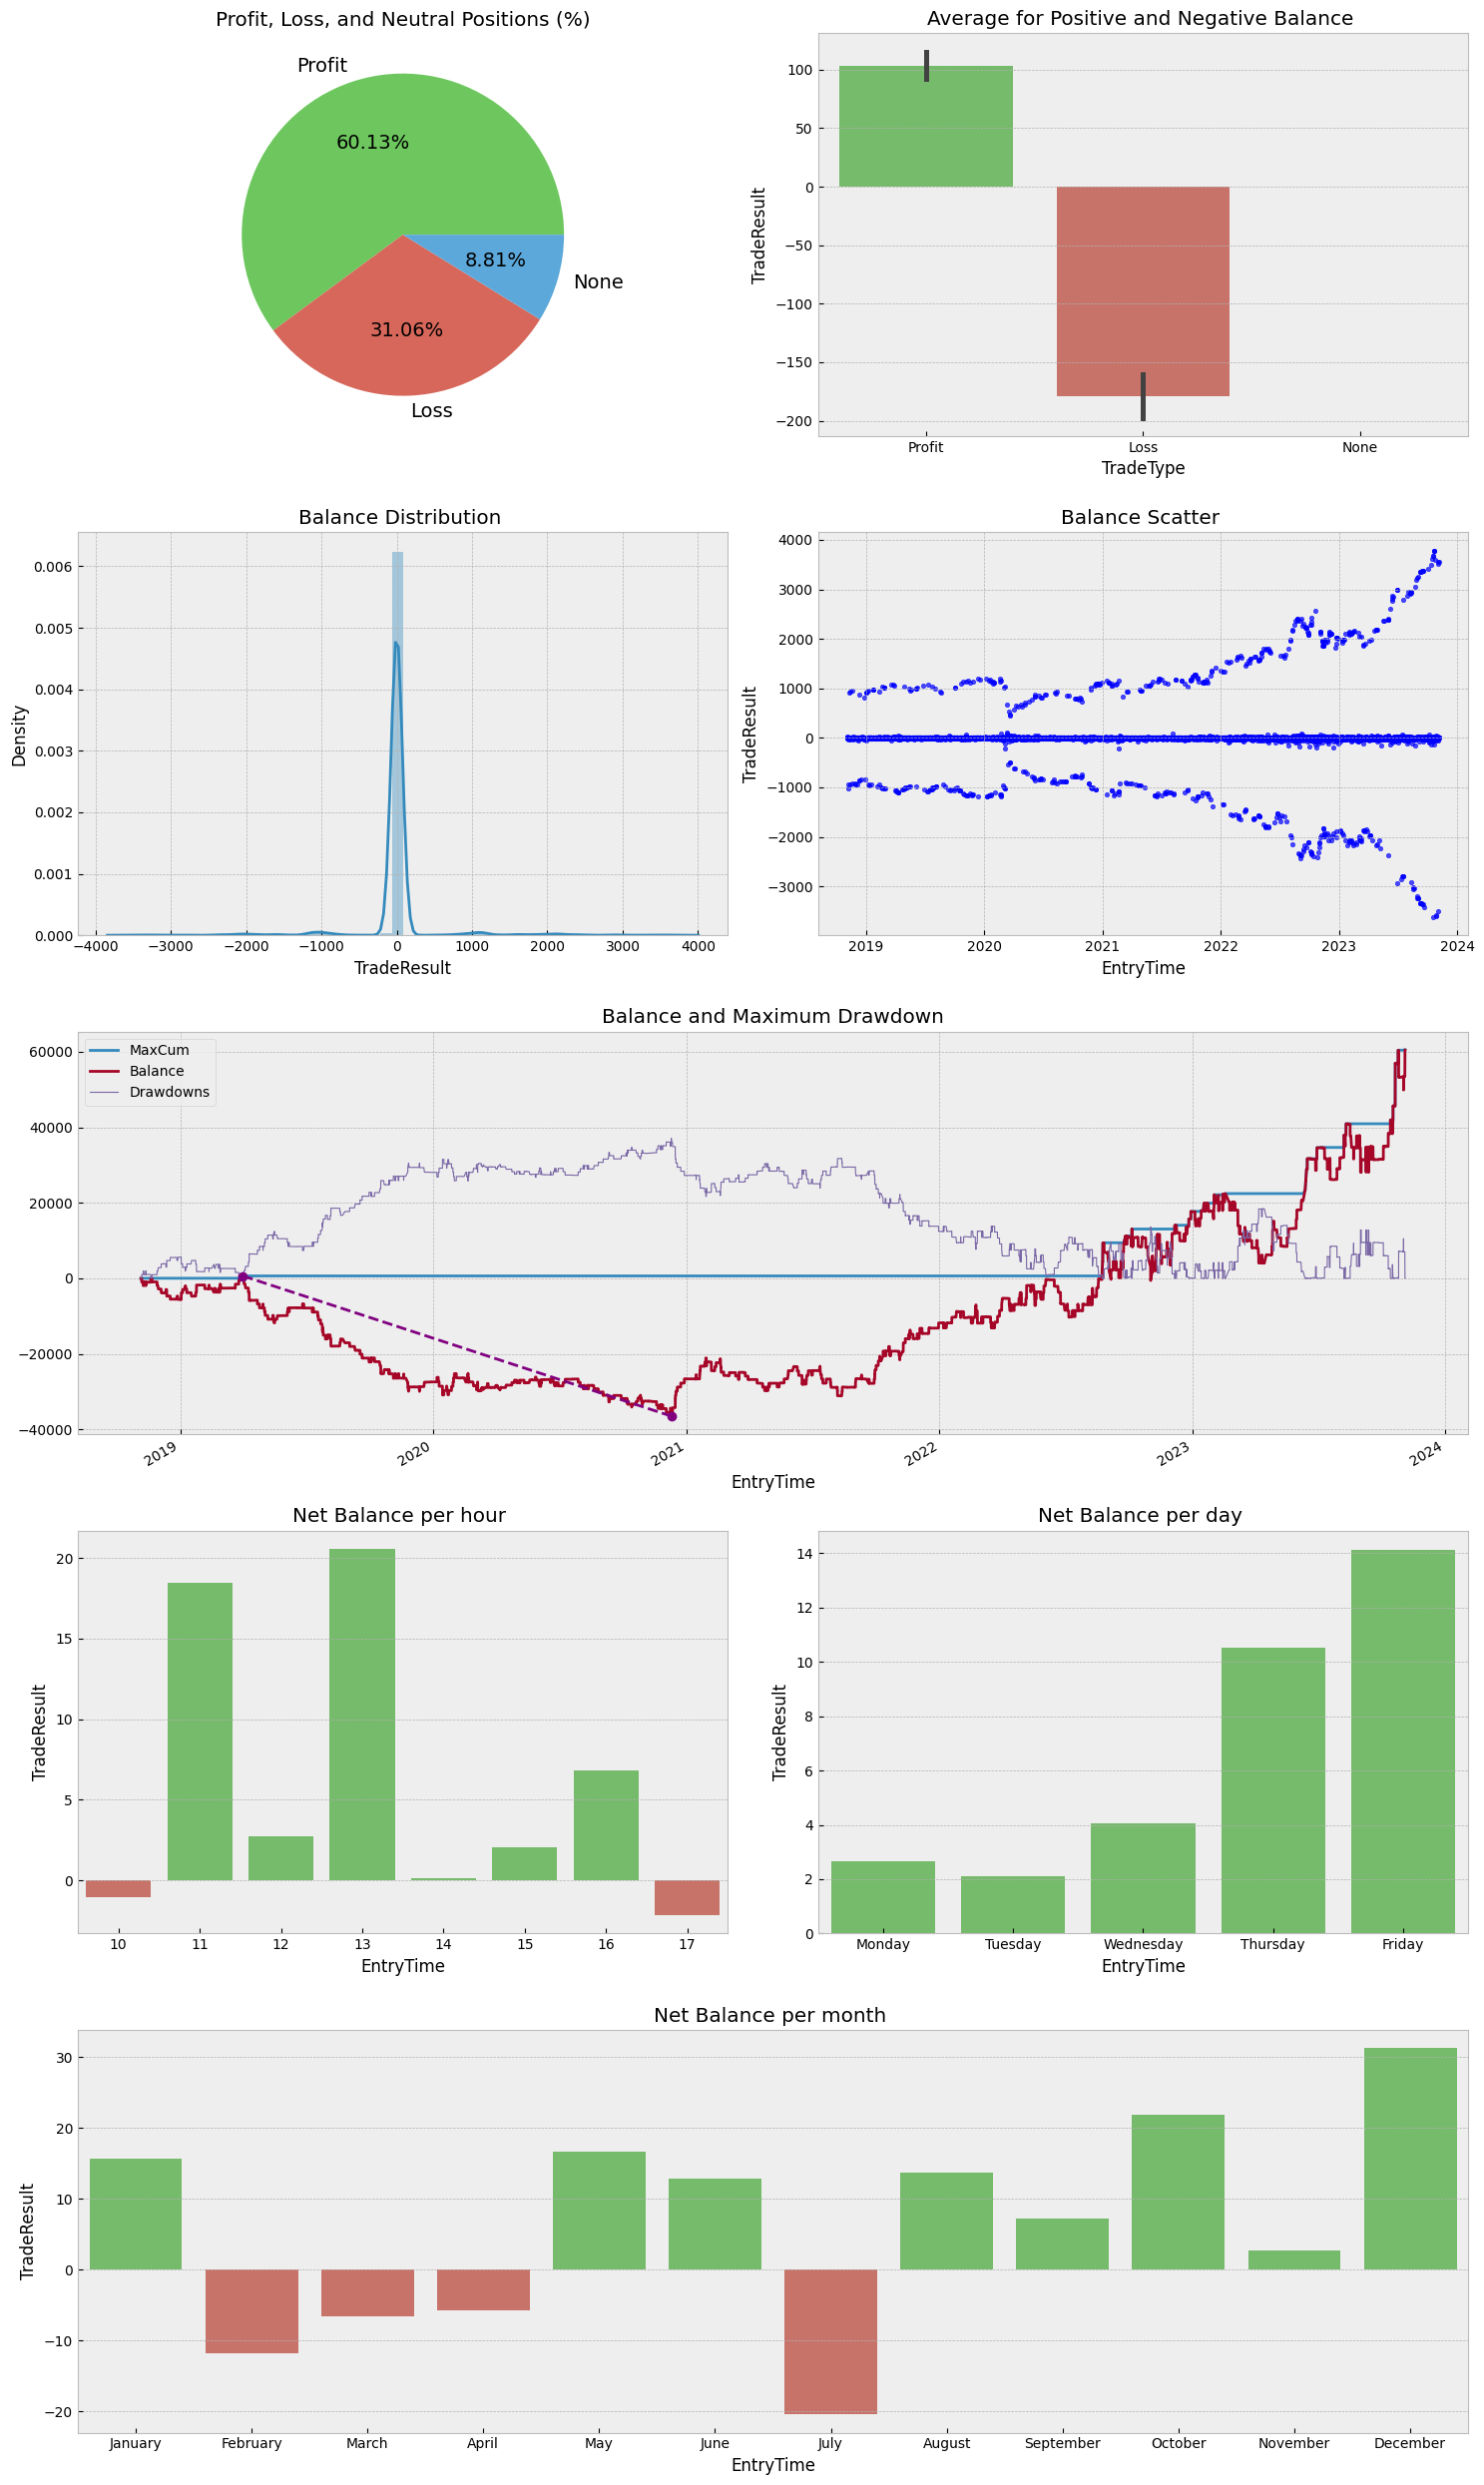

In [7]:
bt.get_report_pointer().plot_report()